In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("C:/Users/Admin/Documents/PYTHON/datasets/datasets/Aircrashes.csv")

In [17]:
df.sample()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
1220,1965,Qtr 4,December,11,South,Fairchild,Fairchild C 123C56,Near Tuy Hoa South,Force Air U.S. - VietnamMilitary,0,85,85


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [19]:
df['Country/Region'].unique()

array([nan, "'-", ' Alaska', '10', 'Afghanistan', 'Aichi', 'Alaska',
       'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan',
       'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia', 'Botswana',
       'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan', 'Moldova'

In [29]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace\
(r"[^A-Za-z0-9_]", "")
df["Country/Region"] = df["Country/Region"].fillna("Unspecified")
df["Operator"] = df["Operator"].fillna("Unspecified")

In [30]:
# Dictionary of Corrections
country_corrections = {
    ' Alaksa':'Alaska',
    'Alakska':'Alaska',
    'AKAlaska' : 'Alaska',
    'Belgian':'Belgium',
    'Brazil/tAmazonaves':'Brazil',
    'British':'Britain',
    'Black' : 'Unknown',
    'Morroco' : 'Morocco',
    'Cameroons':'Cameroon',
    'China?':'China',
    'Deleware' : 'Delaware',
    'Democratic':'Democratic Republic of Congo',
    'Democtratic' : 'Democratic Republic of Congo',
    'Equatorial':'Equatorial Guinea',
    'French':'France',
    'Hong':'Hong Kong',
    'India\tPawan':'India',
    'near':'California',
    'New':'Unknown',
    'North':'North Korea',
    'Northern':'Northern Ireland',
    'Norway\tCHC':'Norway',
    'ON':'Ontario',
    'QC' : 'Quebec',
    'Papua':'Papua New Guinea',
    'Puerto':'Puerto Rico',
    'Saudi':'Saudi Arabia',
    'Russian' : 'Russia',
    'SK':'Canada',
    'NYUS' : 'United States',
    'South-West':'South Africa',
    'Sri':'Sri Lanka',
    'Kent': 'Kentucky',
    'Tennesee':'Tennessee',
    'USSRAeroflot':'Russia',
    '100':'Unknown',
    'Phillipines': 'Philippines',
    'Philipines' : 'Philippines',
    'BC':'British Columbia Canada',
    'Bias':'China',
    'Brazil\tLoide':'Brazil',
    'miles':'Unknown',
    'Spain\r\n\t\r\nMoron':'Spain',
    'United':'United Arab Emirates',
    'Airlines':'Unknown',
    'PQ' : 'Quebec',
    'Coloado':'Colorado',
    'D.C.Capital':'Washington DC',
    'Florida?':'Florida',
    'off':'Unknown',
     'The':'Unknown',
    'Argentinade':'Argentina',
    'California?':'California',
    'D.C.Air':'Florida',
    'El':'El Salvador',
    'Germany?' : 'Germany',
    'Indonesia\r\n\t\r\nSarmi':'Indonesia',
    'South' : 'Unknown',
    'NSW':'Australia',
    'UARMisrair':'Egypt',
    'Minnesota46826/109':'Minnesota',
    'Qld.':'Australia',
    'OLD' : 'Unknown',
    'U.S.':'United States',
    '325':'Unspecified',
    '110':'Unspecified',
    '116':'Unspecified',
    '18':'Unspecified',
    '570':'Unspecified',
    'Germany?':'Germany',
    'German' : 'Germany',
    'Azerbaijan\r\n\t\r\nBakou':'Azerbaijan',
    'USSRBalkan':'Balkan States',
    'Brazil\r\nFlorianopolis':'Brazil',
    'Chile\tAerolineas':'Chile',
    'Honduras?':'Honduras',
    'US':'United States',
    'Afghanstan':'Afghanistan',
    'USSRMilitary':'Russia',
    '800':'Unknown',
    'Great' : 'United Kingdom',
    'UKBritish' : 'United Kingdom',                             
    'Tajikistan\tMilitary':'Tajikistan',
    'USSRAerflot':'Russia',
    'Djibouti\r\n\tDjibouti':'Djibouti',
    'Djbouti' : 'Djibouti',
    'France?':'France',
    'UAEGulf':'United Arab Emirates',
    'Virginia.American':'Virginia America',
     "'-":'Unspecified',
    '10':'Unspecified',
    'Unkown':'Unspecified',
    'East' : 'Unknown',
    'Air' : 'Unknown',
    'NWT Canada' : 'Unknown',
    'American' : 'United States',
    'SC': 'United States',
    'FL' : 'Florida',
    'UAE' : 'United Arab Emirates',
    'Prov.': 'France',
    'Ross' : 'Unknown',
    'Saint': 'Unknown',
    'de' : 'Delaware',
    'DR' : 'Dominican Republic',
    'Mexic' : 'Mexico',
    'Mt.' : 'Unknown',
    'N' : 'Unknown',
    'Isle' : 'Unknown',
     'Italyde' : 'Italy',
    'NWT' : 'Canada',
    'Da' : 'Unknown',
    'Los' : 'United States',
    'NE' : 'Nebraska',
    'west' : 'Unknown',
    'St.' : 'Unknown',
    'Indian' : 'India',
    'Irian' : 'Iran',
    'HIAir' : 'Unknown',
    'CAMilitary' : 'Unknown',
    'Islay' : 'Scotland',
    'Gulf' : 'Unknown',
    'PE' : 'Peru'
}

# Apply this corrections
df["Country/Region"] = df["Country/Region"].replace(country_corrections)
# Check Correction
print("After corrections - sample of changes:")
print(df['Country/Region'].value_counts().head(10))

After corrections - sample of changes:
Country/Region
Russia         287
Unknown        271
Unspecified    241
Brazil         164
Colombia       146
California     134
France         125
Alaska         103
India          100
Indonesia       89
Name: count, dtype: int64


In [31]:
print(df.columns.tolist())

['Year', 'Quarter', 'Month', 'Day', 'Country/Region', 'Aircraft_Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground', 'Fatalities_(air)', 'Aboard']


In [32]:
df['Aircraft_Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers', 'Antonov', 'Boeing',
       'Airbus', 'Aero Commander', 'Britten', 'Cessna', 'Hughes',
       'McDonnell Douglas', 'Pilgrim', 'Ilyushin', 'Hawker Siddeley',
       'HS', 'Avro', 'Lockheed', 'Swearingen', 'Yakovlev', 'Curtiss',
       'Mil', 'Convair', 'Consolidated', 'Embraer', 'Learjet', 'NAMC',
       'Cams', 'Ford', 'Grumman', 'de Havilland', 'Pilatus', 'Sikorsky',
       'Not Specified', 'Aérospatiale', 'Bell', 'Handley Page',
       'Canadair', 'Bristol', 'Fokker', 'Junkers', 'Sud Aviation',
       'BAC Super', 'Aerocomp', 'Fairchild', 'Farman', 'Dornier',
       'Aviation Traders', 'Focke', 'Messerschmitt', 'Beechcraft',
       'Swallow\r\nSwallow?', 'Stearman', 'British Aerospace',
       'Britten Norman', 'Mitsubishi', 'OFM', 'Kawasaki', 'Martin',
       'Shin Meiwa', 'Harbin', 'Aerospatiale', 'Caudron C.635', 'Lisnov',
       'Zeppelin', 'Saab', 'Goodyear', 'Short', 'Stinson', 'Eurocopter',
       'Piper', 'Let', 'ATR', 'Lisu

In [33]:
# Cleaning the Aircraft Manufacturer columns
# removing extra or meaningless spaces
df['Aircraft_Manufacturer'] = df['Aircraft_Manufacturer'].str.strip()  

# Replacing non-valid entries with NaN or "Not Specified"
problematic_entries = ['??', '?VH', '?NC21V', 'Unknown /', 'C', 'UH', 'DC', 'PA', 'VC', '?139', '?VP', '?42', '']
df['Aircraft_Manufacturer'] = df['Aircraft_Manufacturer'].replace(problematic_entries, 'Not Specified')

In [34]:
# Dictionary of correction
manufacturer_corrections = {
    # Douglas variations
    'Doublas': 'Douglas',
    'MD Douglas': 'McDonnell Douglas',
    
    # De Havilland variations
    'De Havilland': 'de Havilland',
    'de Hvilland 89A Dragon': 'de Havilland',
    'de Havilland  Canada': 'de Havilland',
    'de Havilland DH106 Comet': 'de Havilland',
    'de Havilland DH.80 Puss': 'de Havilland',
    
    # Cessna - remove specific models
    'Cessna 208B Caravan': 'Cessna',
    'Cessna  208B Grand': 'Cessna',
    'Cessna 208 Grand': 'Cessna',
    'Cessna 208B Grand': 'Cessna',
    'Cessna 208B Caravan I Super': 'Cessna',
    'Cessna  501': 'Cessna',
    
    # Boeing variations
    'Boeing 377 Stratocruiser': 'Boeing',
    'Boeing Vertol CH47C': 'Boeing',
    'Boeing Vertol CH47B': 'Boeing',
    'Boeing Vertol': 'Boeing',
    
    # Lockheed variations - remove specific models
    'Lockheed 14': 'Lockheed',
    'Lockheed 18': 'Lockheed',
    'Lockheed 14 Super': 'Lockheed',
    'Lockheed 749A': 'Lockheed',
    'Lockheed 188C': 'Lockheed',
    'Lockheed 188A': 'Lockheed',
    'Lockheed 1049H Super': 'Lockheed',
    'Lockheed 1049G Super': 'Lockheed',
    'Lockheed Hudson': 'Lockheed',
    'Lockheed Super': 'Lockheed',
    'Lockheed 10': 'Lockheed',
    'Lockheed 10 Electra': 'Lockheed',
    'Lockheed 10B': 'Lockheed',
    'Lockheed 10E': 'Lockheed',
    'Lockheed 9': 'Lockheed',
    'Lockheed Orion 9E Explorer float': 'Lockheed',
    'Lockheed 5': 'Lockheed',
    'Lockheed Vega': 'Lockheed',
    'Lockheed Martin': 'Lockheed',
    
    # Embraer variations
    'Embraer 110EJ Band./Embraer 110P': 'Embraer',
    'Embraer/Piper': 'Embraer',
    'Embraer 110P1': 'Embraer',
    'Embraer 120ER': 'Embraer',
    'Embraer 110': 'Embraer',
    'Embraer 120': 'Embraer',
    
    # Fokker variations
    'Fokker FG': 'Fokker',
    
    # Vickers variations - clean up specific models
    'Vickers Vanguard': 'Vickers',
    'Vickers Viscount': 'Vickers',
    'Vickers 610 Viking': 'Vickers',
    'Vickers Viking 1B & Soviet': 'Vickers',
    'Vickers Valetta': 'Vickers',
    'Vickers Wellington': 'Vickers',
    'Vickers 757': 'Vickers',
    'Vickers 804': 'Vickers',
    'Vickers 634 Viking': 'Vickers',
    'Vickers 815': 'Vickers',
    'Vickers 708': 'Vickers',
    'Vickers Viscount 827 / Fokker': 'Vickers',
    'Vickers Viscount 764': 'Vickers',
    'Vickers Viking': 'Vickers',
    
    # Antonov variations
    'AeroflotL5057': 'Antonov',  # Seems to be a misplaced Antonov identifier
    
    # Avro variations
    'Avro 685 York': 'Avro',
    'Avro Shackleton': 'Avro',
    'Avro 691 Lancastrian': 'Avro',
    'Avro 688 Super': 'Avro',
    'Avro Lancaster': 'Avro',
    'Avro  685 York': 'Avro',
    
    # Bell variations
    'Bell 212FAC': 'Bell',
    'Bell 205': 'Bell',
    'Bell 206B': 'Bell',
    'Bell Huey': 'Bell',
    
    # British Aerospace variations
    'British Aerospace BAe': 'British Aerospace',
    
    # Consolidated variations
    'Consolidated Canso': 'Consolidated',
    
    # Curtiss variations/typo fix
    'Curtis': 'Curtiss',  
    'Curtiss C': 'Curtiss',
    
    # Dassault variations
    'Dassault Falcon': 'Dassault',
    
    # Dornier - remove specific model
    'Eurocopter Deutschland': 'Eurocopter',
    
    # Let variations
    'Let 410UVP': 'Let',
    'Let 410UVP Turbojet / Tupolev': 'Let',
    'LET 410M': 'Let',
    
    # Learjet variations
    'Gates Learjet': 'Learjet',
    
    # Mi/Mil variations
    'Mi': 'Mil',
    'Mil Mi 8T': 'Mil',
    
    # Piper variations
    'Piper Aerostar 601 / Bell 412SPN3645D /': 'Piper',
    'Piper Navajo': 'Piper',
    
    # Pilatus variations
    'Pilatus Britten Norman': 'Pilatus',
    
    # Sikorsky variations
    'Sikorsky S43 (flying': 'Sikorsky',
    
    # Sud Aviation variations
    'Sud Aviation Caravelle': 'Sud Aviation',
    'Sud Aviation SE 210 Caravelle': 'Sud Aviation',
    'Sud': 'Sud Aviation',
    
    # Swearingen variations
    'Swearingen SA227AC Metroliner': 'Swearingen',
    'Swearingen SA.227AC Metro': 'Swearingen',
    'Swearingen SA.227AC Metro': 'Swearingen',
    
    # Specific aircraft that should be cleaned
    'Hadley Page 137Jetstream I / Cessna 206N11360 /': 'Handley Page',
    'B17G Flying': 'Boeing',
    'Catalina Flying': 'Consolidated',
    'Supermarine Stranraer (flying': 'Supermarine',
    'Beechcraft C99 / Rockwell': 'Beechcraft',
    'Short Sandringham (flying': 'Short Sandringham',
    'Short Sandringham 5 (flying': 'Short Sandringham',
    'Short S23 \'C\' Class flying': 'Short Sandringham',
    'Latecoere 631 (flying': 'Latecoere',
    'Latécoère 23 (flying': 'Latecoere',
    'Latécoère 300 (float': 'Latecoere',
    'Avro 691 Lancastrian (flying': 'Avro',
    
    # Other variations
    'Aerospatiale AS350 Eurocopter': 'Aerospatiale',
    'Aerospatiale Caravelle': 'Aerospatiale',
    'Aerocomp Comp Air': 'Aerocomp',
    'Bristol Britannia': 'Bristol',
    'Bristol 170 Freighter': 'Bristol',
    'Bristol 170': 'Bristol',
    'Bristol 175 Britannia': 'Bristol',
    'Bristol 28': 'Bristol',
    'Eurocopter EC225LP Super Puma M2+': 'Eurocopter',
    'Eurocopter AS 332L2 Super Puma': 'Eurocopter',
    'Grumman G73T Turbo': 'Grumman',
    'Hawker Siddeley Trident': 'Hawker Siddeley',
    'Hindustan Aeronautics 748': 'Hindustan Aeronautics',
    'Martin PBM': 'Martin',
    'Stinson Model': 'Stinson',
    
    # Handle some mysterious entries
    '"Swallow': 'Swallow',
    'Swallow?"': 'Swallow',
    'Harbin Yunshuji': 'Harbin',
    'Yunshuji': 'Harbin',
    
    # Blériot variations
    'Blériot Spad': 'Blériot',
}

# Apply corrections
df['Aircraft_Manufacturer'] = df['Aircraft_Manufacturer'].replace(manufacturer_corrections)

In [35]:
df.head(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
0,1970,Qtr 2,April,28,Unspecified,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,Unspecified,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,Unspecified,Vickers,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,Unspecified,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,Unspecified,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
5,1960,Qtr 2,April,14,Unspecified,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2
7,1958,Qtr 2,April,21,Unspecified,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49
8,1997,Qtr 2,April,23,Afghanistan,Antonov,Antonov AN 26?,Near Konduz Afghanistan,Force Air Republican Afghan - Military,0,36,36
9,1988,Qtr 2,April,10,Afghanistan,Antonov,Antonov AN 26?,Near Mazâr-e Charif Afghanistan,Force Air Republican Afghan - Military,0,29,29


In [36]:
# Cleaning the Aircraft column

# Remove extra spaces
df['Aircraft'] = df['Aircraft'].str.strip()  
# Replace Non-valid entries
non_valid_entries = ['??', '?NC21V', '?VH  TAT', 'Unknown / Unknown?', 'C  47(DC', '"Swallow', 'Swallow?"']
df['Aircraft'] = df['Aircraft'].replace(non_valid_entries, 'Not Specified')

In [37]:
# Dictionary of correction for specific aircraft
aircraft_corrections = {
    # Boeing variations
    'Boeing B 707': 'Boeing 707',
    'Boeing B 727': 'Boeing 727', 
    'Boeing B 737': 'Boeing 737',
    'Boeing B 747': 'Boeing 747',
    'Boeing B 757': 'Boeing 757',
    'Boeing B 767': 'Boeing 767',
    'Boeing B 777': 'Boeing 777',
    'Boeing KC': 'Boeing KC-135',
    'Boeing CH': 'Boeing CH-47',
    'Boeing 40': 'Boeing 40',
    'Boeing 377': 'Boeing 377',
    'Boeing 707': 'Boeing 707',
    'Boeing 720': 'Boeing 720',
    'Boeing 727': 'Boeing 727',
    'Boeing 737': 'Boeing 737',
    'Boeing 747': 'Boeing 747',
    'Boeing 777': 'Boeing 777',
    'Boeing Vertol CH47C': 'Boeing CH-47',
    'Boeing Vertol CH47B': 'Boeing CH-47',
    'Boeing Vertol CH': 'Boeing CH-47',
    
    # Douglas variations
    'Doublas Dc': 'Douglas DC-3',
    'Douglas C': 'Douglas C-47',
    'Douglas DC': 'Douglas DC-3',
    'Douglas C 47': 'Douglas C-47',
    'Douglas C 47A': 'Douglas C-47',
    'Douglas C 47B': 'Douglas C-47',
    'Douglas C 47C': 'Douglas C-47',
    'Douglas C 47D': 'Douglas C-47',
    'Douglas DC 2': 'Douglas DC-2',
    'Douglas DC 3': 'Douglas DC-3',
    'Douglas DC 4': 'Douglas DC-4',
    'Douglas DC 6': 'Douglas DC-6',
    'Douglas DC 6A': 'Douglas DC-6',
    'Douglas DC 6B': 'Douglas DC-6',
    'Douglas DC 7': 'Douglas DC-7',
    'Douglas DC 8': 'Douglas DC-8',
    'Douglas DC 9': 'Douglas DC-9',
    'Douglas C 54': 'Douglas C-54',
    'Douglas C 54A': 'Douglas C-54',
    'Douglas C 54B': 'Douglas C-54',
    'Douglas C 54D': 'Douglas C-54',
    'Douglas C 118A': 'Douglas C-118',
    'Douglas C 124C': 'Douglas C-124',
    'MD Douglas DC': 'McDonnell Douglas DC-9',
    
    # McDonnell Douglas
    'McDonnell Douglas DC': 'McDonnell Douglas DC-9',
    'McDonnell Douglas MD': 'McDonnell Douglas MD-80',
    'McDonnell Douglas DC 8': 'McDonnell Douglas DC-8',
    'McDonnell Douglas DC 9': 'McDonnell Douglas DC-9',
    'McDonnell Douglas DC 10': 'McDonnell Douglas DC-10',
    'McDonnell Douglas MD 11': 'McDonnell Douglas MD-11',
    'McDonnell Douglas MD 82': 'McDonnell Douglas MD-82',
    'McDonnell Douglas MD 90': 'McDonnell Douglas MD-90',
    
    # Lockheed variations
    'Lockheed C': 'Lockheed C-130',
    'Lockheed L': 'Lockheed L-1011',
    'Lockheed 10': 'Lockheed L-10',
    'Lockheed 14': 'Lockheed L-14',
    'Lockheed 18': 'Lockheed L-18',
    'Lockheed Hudson': 'Lockheed Hudson',
    'Lockheed P': 'Lockheed P-3',
    'Lockheed 749A': 'Lockheed L-749',
    'Lockheed 1049G': 'Lockheed L-1049',
    'Lockheed 1049H': 'Lockheed L-1049',
    'Lockheed 1011': 'Lockheed L-1011',
    'Lockheed Martin L': 'Lockheed L-100',
    
    # Antonov variations
    'Antonov AN': 'Antonov An-24',
    'Antonov An': 'Antonov An-24',
    'Antonov 12': 'Antonov An-12',
    'Antonov 26': 'Antonov An-26',
    'Antonov 28': 'Antonov An-28',
    'Antonov 32': 'Antonov An-32',
    'Antonov 74': 'Antonov An-74',
    
    # Ilyushin variations
    'Ilyushin IL': 'Ilyushin Il-18',
    'Ilyushin Il': 'Ilyushin Il-18',
    
    # Tupolev variations
    'Tupolev TU': 'Tupolev Tu-154',
    'Tupolev Tu': 'Tupolev Tu-154',
    'Tupolev 134A': 'Tupolev Tu-134',
    'Tupolev 154B': 'Tupolev Tu-154',
    'Tupolev 154M': 'Tupolev Tu-154',
    
    # De Havilland variations
    'de Havilland Canada DHC': 'de Havilland DHC-6',
    'de Havilland DHC': 'de Havilland DHC-6',
    'De Havilland DH': 'de Havilland DH-114',
    'de Havilland DH': 'de Havilland DH-114',
    'de Hvilland': 'de Havilland Dragon Rapide',
    
    # Fokker variations
    'Fokker F': 'Fokker F-27',
    'Fokker FG': 'Fokker F.VII',
    
    # Vickers variations
    'Vickers Viscount': 'Vickers Viscount',
    'Vickers Viking': 'Vickers Viking',
    'Vickers 634': 'Vickers Viking',
    'Vickers 610': 'Vickers Viking',
    'Vickers 708': 'Vickers Viscount',
    'Vickers 745': 'Vickers Viscount',
    'Vickers 757': 'Vickers Viscount',
    'Vickers 764': 'Vickers Viscount',
    'Vickers 785': 'Vickers Viscount',
    'Vickers 804': 'Vickers Viscount',
    'Vickers 812': 'Vickers Viscount',
    'Vickers 815': 'Vickers Viscount',
    'Vickers 827': 'Vickers Viscount',
    
    # Curtiss variations
    'Curtis C': 'Curtiss C-46',
    'Curtiss C': 'Curtiss C-46',
    'Curtiss JN': 'Curtiss JN-4',
    
    # Airbus variations
    'Airbus A300B4': 'Airbus A300',
    'Airbus A300F': 'Airbus A300',
    'Airbus A320': 'Airbus A320',
    'Airbus A330': 'Airbus A330',
    'Airbus A340': 'Airbus A340',
    
    # Other aircraft
    'Cessna 172': 'Cessna 172',
    'Cessna 177': 'Cessna 177',
    'Cessna 185': 'Cessna 185',
    'Cessna 208B': 'Cessna 208',
    'Cessna 206': 'Cessna 206',
    'Cessna 402C': 'Cessna 402',
    'Cessna 501': 'Cessna Citation',
    
    # Bell helicopters
    'Bell 206': 'Bell 206',
    'Bell 212': 'Bell 212',
    'Bell 205': 'Bell 205',
    'Bell Huey': 'Bell UH-1',
    'UH': 'Bell UH-60',
    
    # Embraer
    'Embraer 110': 'Embraer EMB-110',
    'Embraer 120': 'Embraer EMB-120',
    'Embraer ERJ': 'Embraer ERJ-190',
    
    #junker
    'Junkers JU': 'Junkers Ju-52',
    'Junkers F': 'Junkers F-13',
    'Junkers G': 'Junkers G-31',
    'Messerschmitt M': 'Messerschmitt M-20',

    #
    'Catalina Flying Boat': 'Consolidated PBY',
    'Short Sandringham': 'Short Sandringham',
    'Sikorsky S': 'Sikorsky S-43',
    'Consolidated PBY': 'Consolidated PBY',
    
    'DC': 'Douglas DC-3',  
    'PA': 'Piper PA-31',   
    'VC': 'Vickers Viking', 
}

# Apply manual corrections
df['Aircraft'] = df['Aircraft'].replace(aircraft_corrections)

In [38]:
df.head(5)

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
0,1970,Qtr 2,April,28,Unspecified,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,Unspecified,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,Unspecified,Vickers,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,Unspecified,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,Unspecified,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [40]:
# Moving on to location column

# Remove extra spaces

df['Location'] = df['Location'].astype(str).str.strip()               
df['Location'] = df['Location'].str.replace(r'\s+', ' ', regex=True) 

In [41]:
# Dictionary of corrections for location
location_corrections = {
        'Shanghi': 'Shanghai',
        'Californila': 'California',
        'Coen Australila': 'Coen Australia',
        'Rio de Janerio': 'Rio de Janeiro',
        'Alasksa': 'Alaska',
        'Russian Mission Alaksa': 'Russian Mission Alaska',
        'Kazakastan': 'Kazakhstan',
        'Yugosalvia': 'Yugoslavia',
        'Bugaria': 'Bulgaria',
        'Czechoslovakia': 'Czech Republic',
        'USSRAeroflot': 'USSR',
        'Coloado': 'Colorado',
        'Bogata': 'Bogota',
        'Mauretania': 'Mauritania',
        'Kazakstan': 'Kazakhstan',
        'Myamar': 'Myanmar',
        'Phillipines': 'Philippines',
        'Portugual': 'Portugal',
        'Saudia Arabia': 'Saudi Arabia',
        'Britian': 'Britain',
        'Morrocco': 'Morocco',
        "Cape d'Arguilar Hong": "Cape de arguilar Hong",
        '"Tawang India Pawan"': 'Tawang India Pawan', 
        '"Sorta Norway CHC"': 'Sorta Norway CHC',
        'North Atlantic Ocean 100': 'North Atlantic Ocean',
        '"Near Belen Brazil loide"': 'Near Belen Brazil loide',
        '"Moron AFB Spain Moron"': 'Moron AFB Spain Moron',
    }
df['Location'] = df['Location'].replace(location_corrections)

In [42]:
location_corrections

{'Shanghi': 'Shanghai',
 'Californila': 'California',
 'Coen Australila': 'Coen Australia',
 'Rio de Janerio': 'Rio de Janeiro',
 'Alasksa': 'Alaska',
 'Russian Mission Alaksa': 'Russian Mission Alaska',
 'Kazakastan': 'Kazakhstan',
 'Yugosalvia': 'Yugoslavia',
 'Bugaria': 'Bulgaria',
 'Czechoslovakia': 'Czech Republic',
 'USSRAeroflot': 'USSR',
 'Coloado': 'Colorado',
 'Bogata': 'Bogota',
 'Mauretania': 'Mauritania',
 'Kazakstan': 'Kazakhstan',
 'Myamar': 'Myanmar',
 'Phillipines': 'Philippines',
 'Portugual': 'Portugal',
 'Saudia Arabia': 'Saudi Arabia',
 'Britian': 'Britain',
 'Morrocco': 'Morocco',
 "Cape d'Arguilar Hong": 'Cape de arguilar Hong',
 '"Tawang India Pawan"': 'Tawang India Pawan',
 '"Sorta Norway CHC"': 'Sorta Norway CHC',
 'North Atlantic Ocean 100': 'North Atlantic Ocean',
 '"Near Belen Brazil loide"': 'Near Belen Brazil loide',
 '"Moron AFB Spain Moron"': 'Moron AFB Spain Moron'}

In [43]:
non_valid_entries = ['??', 'Pepa  -', 'Pindi-Khut  -', 'Taipei -', 'Near ', 'Off ', '?', '-']
df['Location'] = df['Location'].replace(non_valid_entries, 'Not Specified')

In [45]:
unknown = df[df["Location"] == "Not Specified"]

In [46]:
unknown

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
5,1960,Qtr 2,April,14,Unspecified,Douglas,Douglas DC 4?,Not Specified,Force Air Thai Royal,0,18,18


In [47]:
# Dictionary of correction for operator
spelling_corrections = {
        'Aeroflot': 'Aeroflot',
        'USSRAeroflot': 'Aeroflot USSR',
        'Airways World American Pan': 'Pan American World Airways',
        'Airways American Pan': 'Pan American Airways',
        'Airways Grace American Pan': 'Pan American Grace Airways',
        'Lufthansa Deutsche': 'Deutsche Lufthansa',
        'Airways Overseas British': 'British Overseas Airways Corporation',
        'Airways European British': 'British European Airways',
        'Airways British': 'British Airways',
        'Force Air U.S. - Military': 'U.S. Air Force',
        'Army U.S. - Military': 'U.S. Army',
        'Navy U.S. - Military': 'U.S. Navy',
        'Force Air Royal - Military': 'Royal Air Force',
        'Service Mail Aerial US': 'U.S. Aerial Mail Service',
        'Lines Air United': 'United Air Lines',
        'Lines Air Eastern': 'Eastern Air Lines',
        'Lines Air Delta': 'Delta Air Lines',
        'Airlines American': 'American Airlines',
        'Airlines Continental': 'Continental Airlines',
        'Airlines Korean': 'Korean Air',
        'Airlines China': 'China Airlines',
        'Force Air Republican Afghan - Military': 'Afghan Republican Air Force',
        'Corporation Aviation National China': 'China National Aviation Corporation',
        'Airways Dutch Royal KLM': 'KLM Royal Dutch Airlines',
        'Airlines Dutch Royal KLM': 'KLM Royal Dutch Airlines',
        'Aerolinie Ceskoslovenske': 'Czechoslovak Airlines',
        'Airlines Hungarian Malev': 'Malev Hungarian Airlines',
        'Airlines Polish Lot': 'LOT Polish Airlines',
        'Force Air Soviet - Military': 'Soviet Air Force',
        'Force Air Russian - Military': 'Russian Air Force',
        'Aviacion de Cubana': 'Cubana de Aviación',
        'Airlines International Pakistan': 'Pakistan International Airlines',
        'Corporation Aviation National': 'China National Aviation Corporation',
        'Swissair': 'Swissair',
        'Alitalia': 'Alitalia',
        'Air France': 'Air France',
        'France Air': 'Air France'
    }
df['Operator'] = df['Operator'].replace(spelling_corrections)

In [48]:
df.tail(20)

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Fatalities_(air),Aboard
5015,1965,Qtr 3,September,27,Vietnam,Beechcraft,Beechcraft C 45HN9574Z,Bao Trai Vietnam,America Air,0,3,3
5016,1970,Qtr 3,September,30,Vietnam,Douglas,Douglas DC-3,Near Da Nang Vietnam,Vietnam) (South Vietnam Air,0,4,38
5017,1969,Qtr 3,September,20,Vietnam,Douglas,Douglas DC 4 / USAF F,Near Hoi An Vietnam,Vietnam) (South Vietnam Air,2,74,76
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,U.S. Army,0,1,2
5019,2001,Qtr 3,September,11,Virginia America,Boeing,Boeing 757,Arlington Virginia.American,Airlines,125,64,64
5020,1958,Qtr 3,September,8,Washington,Boeing,Boeing B 52 / Boeing B,Near Fairchild AFB Washington,Force Air U.S. / Force Air U.S. - Military,0,13,16
5021,1962,Qtr 3,September,10,Washington,Boeing,Boeing KC 135A60,Near Milan Washington,U.S. Air Force,0,44,44
5022,1953,Qtr 3,September,1,Washington,Douglas,Douglas DC 3N19941,Vail Washington,Airlines Cargo Regina,0,21,21
5023,1982,Qtr 3,September,11,West,Boeing,Boeing Vertol CH 47C (helicopter)74,Near Mannheim West,Army U.S. - GermanyMilitary,0,46,46
5024,1985,Qtr 3,September,6,Wisconsin,McDonnell Douglas,McDonnell Douglas DC-9,Milwaukee Wisconsin,Express Midwest,0,31,31


In [50]:
# standardizing the operator column
military_standardizations = {
        'Force Air U.S. Army - Military': 'U.S. Army Air Forces',
        'Forces Air Army U.S. - Military': 'U.S. Army Air Forces',
        'Corps Marine U.S. - Military': 'U.S. Marine Corps',
        'Corps Marine U.S. - VietnamMilitary': 'U.S. Marine Corps',
        'Army U.S. - VietnamMilitary': 'U.S. Army',
        'Force Air U.S. - VietnamMilitary': 'U.S. Air Force',
        'Force Air U.S. - GermanyMilitary': 'U.S. Air Force',
        'Force Air U.S. - PakistanMilitary': 'U.S. Air Force',
        'Force Air U.S. - VirginiaMilitary': 'U.S. Air Force',
        'Force Air U.S. - KoreaMilitary': 'U.S. Air Force',
        'Force Air U.S. - DekotaMilitary': 'U.S. Air Force',
        'Force Air U.S. - JerseyMilitary': 'U.S. Air Force',
        'Force Air U.S. - MexicoMilitary': 'U.S. Air Force',
        'Force Air U.S. - RicoMilitary': 'U.S. Air Force',
        'Navy States United - Military': 'U.S. Navy',
        'Navy US  - Military': 'U.S. Navy',
        'Navy U.S. - KoreaMilitary': 'U.S. Navy',
        'Navy U.S. - VietnamMilitary': 'U.S. Navy',
        'Navy U.S. - IslandsMilitary': 'U.S. Navy',
        'Navy U.S. - JerseyMilitary': 'U.S. Navy',
        'Navy German - Military': 'German Navy',
        'Navy German - SeaMilitary': 'German Navy',
        'Navy British Royal - Military': 'Royal Navy',
        'Force Air Canadian Royal - Military': 'Royal Canadian Air Force',
        'Force Air Royal - LankaMilitary': 'Sri Lankan Air Force',
        'Force Air Lanka Sri - LankaMilitary': 'Sri Lankan Air Force'
    }
df['Operator'] = df['Operator'].replace(military_standardizations)

In [51]:
military_standardizations

{'Force Air U.S. Army - Military': 'U.S. Army Air Forces',
 'Forces Air Army U.S. - Military': 'U.S. Army Air Forces',
 'Corps Marine U.S. - Military': 'U.S. Marine Corps',
 'Corps Marine U.S. - VietnamMilitary': 'U.S. Marine Corps',
 'Army U.S. - VietnamMilitary': 'U.S. Army',
 'Force Air U.S. - VietnamMilitary': 'U.S. Air Force',
 'Force Air U.S. - GermanyMilitary': 'U.S. Air Force',
 'Force Air U.S. - PakistanMilitary': 'U.S. Air Force',
 'Force Air U.S. - VirginiaMilitary': 'U.S. Air Force',
 'Force Air U.S. - KoreaMilitary': 'U.S. Air Force',
 'Force Air U.S. - DekotaMilitary': 'U.S. Air Force',
 'Force Air U.S. - JerseyMilitary': 'U.S. Air Force',
 'Force Air U.S. - MexicoMilitary': 'U.S. Air Force',
 'Force Air U.S. - RicoMilitary': 'U.S. Air Force',
 'Navy States United - Military': 'U.S. Navy',
 'Navy US  - Military': 'U.S. Navy',
 'Navy U.S. - KoreaMilitary': 'U.S. Navy',
 'Navy U.S. - VietnamMilitary': 'U.S. Navy',
 'Navy U.S. - IslandsMilitary': 'U.S. Navy',
 'Navy U.S. - J

In [56]:
df['Fatalities'] = df['Ground'] + df['Fatalities_(air)']

In [62]:
df = df.rename(columns={'Fatalities_(air)': 'Air'})

In [63]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft_Manufacturer,Aircraft,Location,Operator,Ground,Air,Aboard,Fatalities
0,1970,Qtr 2,April,28,Unspecified,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11,8
1,1952,Qtr 2,April,30,Unspecified,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9,9
2,1973,Qtr 2,April,10,Unspecified,Vickers,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145,108
3,2000,Qtr 2,April,19,Unspecified,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24,24
4,1946,Qtr 2,April,30,Unspecified,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12,12


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026 entries, 0 to 5025
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5026 non-null   int64 
 1   Quarter                5026 non-null   object
 2   Month                  5026 non-null   object
 3   Day                    5026 non-null   int64 
 4   Country/Region         5026 non-null   object
 5   Aircraft_Manufacturer  5026 non-null   object
 6   Aircraft               5026 non-null   object
 7   Location               5026 non-null   object
 8   Operator               5026 non-null   object
 9   Ground                 5026 non-null   int64 
 10  Air                    5026 non-null   int64 
 11  Aboard                 5026 non-null   int64 
 12  Fatalities             5026 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 510.6+ KB


Research Question

Country/Region with the most crashes:
Country/Region
Russia    287
Name: count, dtype: int64


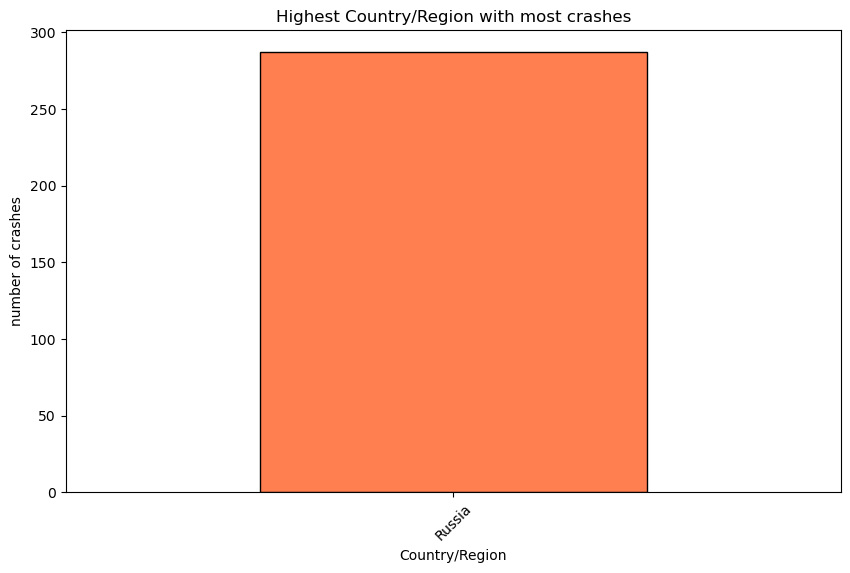

In [80]:
# Question 1 : Which country/region have the highest number of crashes?
top_country = df['Country/Region'].value_counts().head(1)
print("Country/Region with the most crashes:")
print(top_country)

plt.figure(figsize=(10,6))
df['Country/Region'].value_counts().head(1).plot(kind='bar', color='coral', edgecolor='black')

plt.title("Highest Country/Region with most crashes")
plt.xlabel("Country/Region")
plt.ylabel("number of crashes")
plt.xticks(rotation=45)
plt.show()

In [115]:
# Question 2 : Top 6 aircraft manufacturers by number of crashes?
top_aircraft_manufacturers= df['Aircraft_Manufacturer'].value_counts().head(6)

print(top_aircraft_manufacturers)

Aircraft_Manufacturer
Douglas                992
Boeing                 401
Lockheed               296
Antonov                285
de Havilland Canada    157
Ilyushin               138
Name: count, dtype: int64


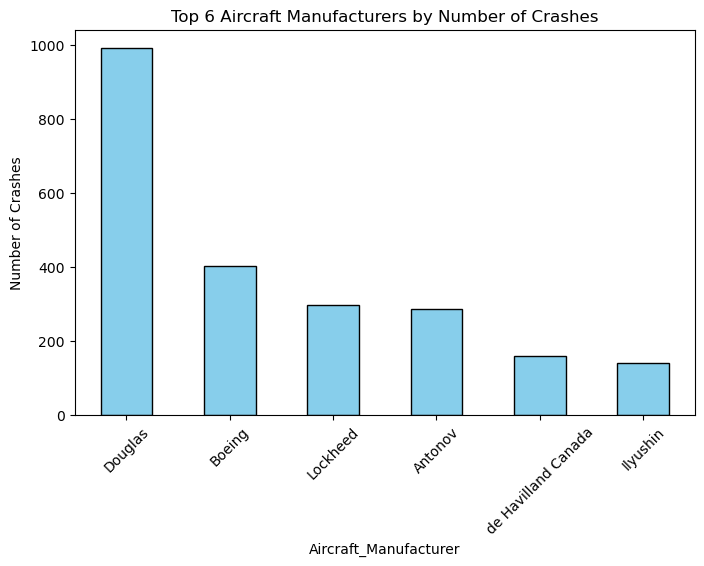

In [113]:
# data visualization
plt.figure(figsize=(8,5))
top_aircraft_manufacturers.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 6 Aircraft Manufacturers by Number of Crashes")
plt.xlabel("Aircraft_Manufacturer")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.show()

Top 5 Operators with the highest number of crashes:
Operator
Unspecified           232
Aeroflot              188
U.S. Air Force        117
Deutsche Lufthansa     57
Air France             56
Name: count, dtype: int64


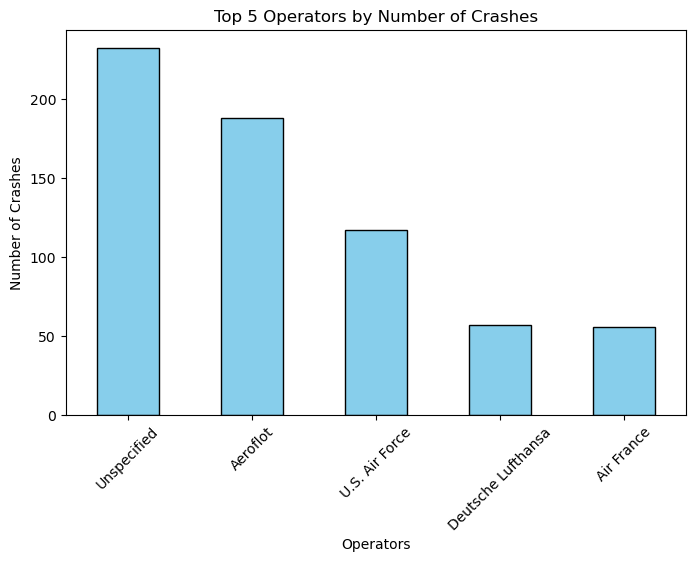

In [85]:
# Question 3: Top 5 Operators with the highest number of crashes?

top_operators = df['Operator'].value_counts().head(5)

print("Top 5 Operators with the highest number of crashes:")
print(top_operators)
plt.figure(figsize=(8,5))
top_operators.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 5 Operators by Number of Crashes")
plt.xlabel("Operators")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45)
plt.show()

In [86]:
# Question 4: # Top 10 years with the highest crashes
top_years = df['Year'].value_counts().head(10)

print("Top 10 Years with the highest crashes:")
print(top_years)

Top 10 Years with the highest crashes:
Year
1946    88
1947    82
1989    82
1962    79
1948    78
1972    77
1945    75
1951    74
1994    74
1970    73
Name: count, dtype: int64


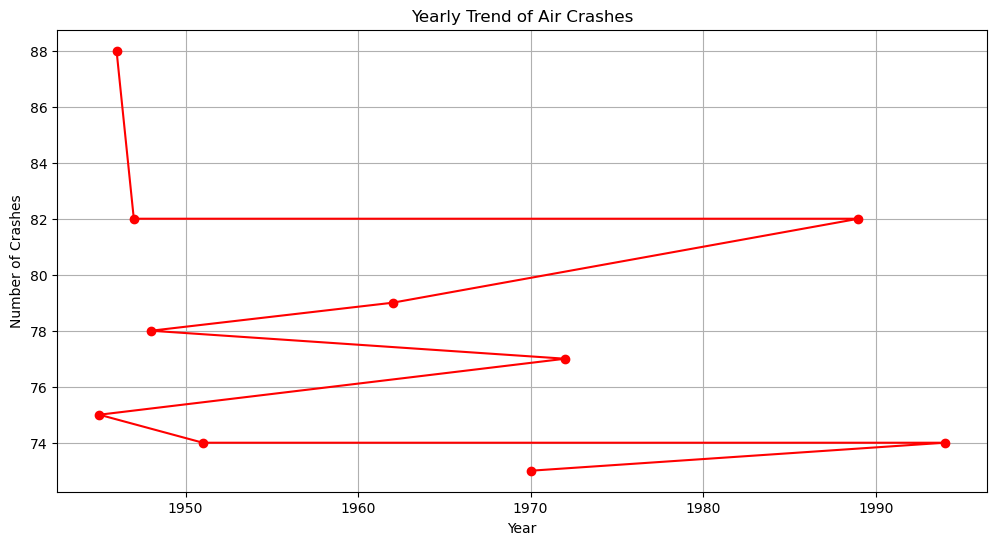

In [88]:
# data visualization
plt.figure(figsize=(12,6))
top_years.plot(kind='line', marker='o', color='red')

plt.title("Yearly Trend of Air Crashes")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()

In [89]:
# Question 5: Top 5 Patterns in the number of fatalities based on the location of the crash?
location_fatalities = (df.groupby('Location')['Fatalities'].sum().reset_index()
                       .sort_values(by='Fatalities', ascending=False).head(5)
                      )

print("Top 5 Locations by Total Fatalities:")
print(location_fatalities)

Top 5 Locations by Total Fatalities:
               Location  Fatalities
2883  New York City New        5663
3910    Tenerife Canary         791
1645   Mt. Osutaka near         520
1580      Moscow Russia         408
1131       Kano Nigeria         379


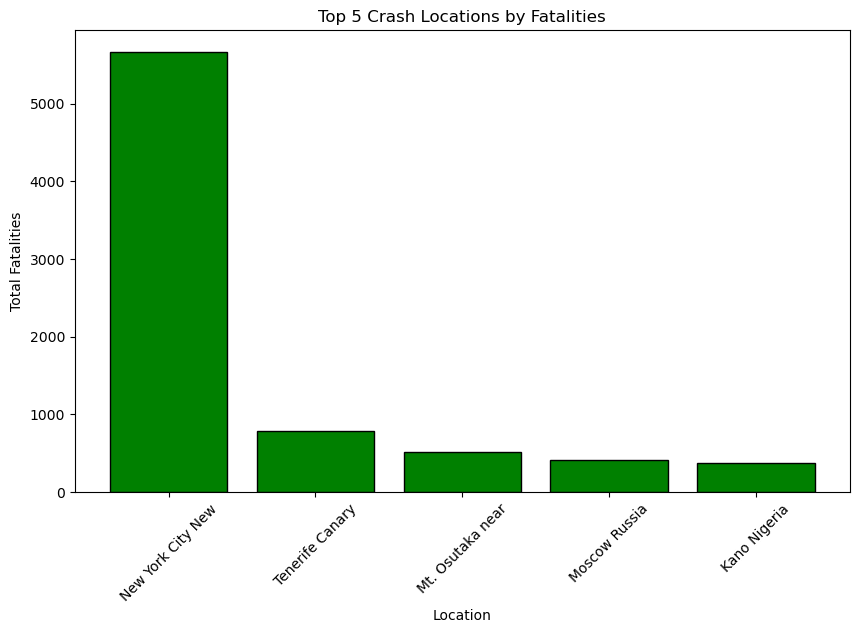

In [91]:
# data visualization
plt.figure(figsize=(10,6))
plt.bar(location_fatalities['Location'], location_fatalities['Fatalities'], color='green', edgecolor='black')

plt.title("Top 5 Crash Locations by Fatalities")
plt.xlabel("Location")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)
plt.show()

In [93]:
# Question 6:Top 5 country/region by number of passengers aboard and the number of fatalities?

top_countries_passengers = (df.groupby('Country/Region')[['Aboard', 'Fatalities']].sum().reset_index()
                            .sort_values(by='Aboard', ascending=False).head(5)
                           )

print("Top 5 Countries/Regions by Passengers Aboard and Fatalities:")
print(top_countries_passengers)

Top 5 Countries/Regions by Passengers Aboard and Fatalities:
    Country/Region  Aboard  Fatalities
328         Russia   12358        9735
391        Unknown    9244       11768
392    Unspecified    7129        5056
72      California    4892        3420
57          Brazil    4226        2948


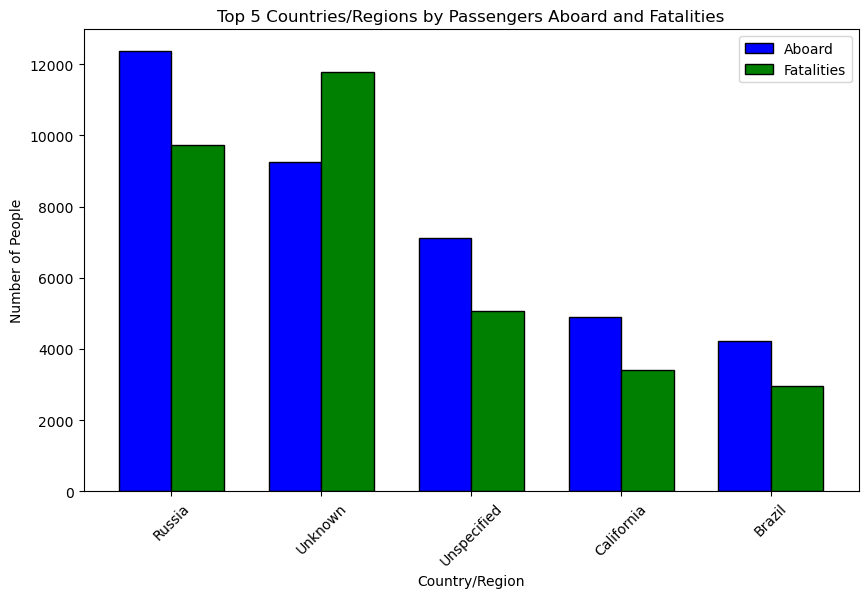

In [96]:
# data visualization
countries = top_countries_passengers['Country/Region']
aboard = top_countries_passengers['Aboard']
fatalities = top_countries_passengers['Fatalities']

x = np.arange(len(countries))
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(x - width/2, aboard, width, label='Aboard', color='blue', edgecolor='black')
plt.bar(x + width/2, fatalities, width, label='Fatalities', color='green', edgecolor='black')

plt.title("Top 5 Countries/Regions by Passengers Aboard and Fatalities")
plt.xlabel("Country/Region")
plt.ylabel("Number of People")
plt.xticks(x, countries, rotation=45)
plt.legend()
plt.show()

Average number of fatalities per crash: 23.95


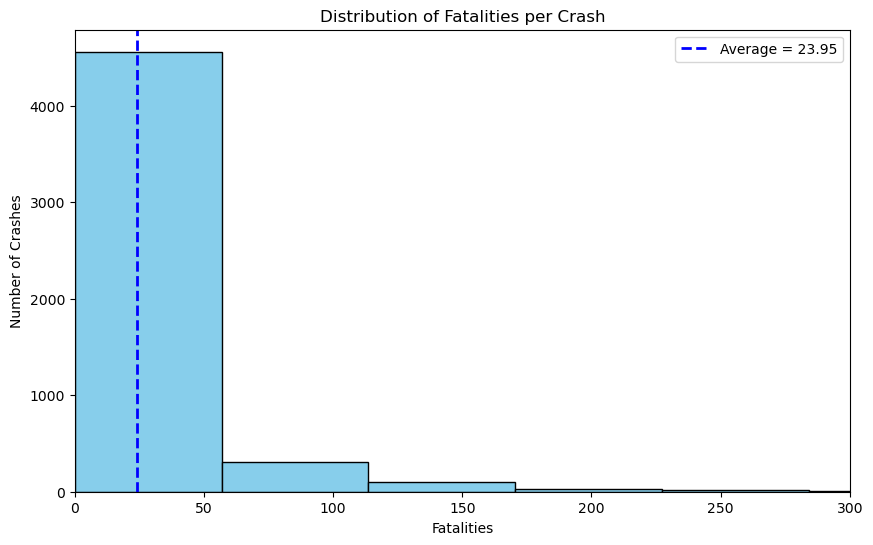

In [106]:
# Question 7: What is the average number of fatalities?
average_fatalities = df['Fatalities'].mean()
print("Average number of fatalities per crash:", round(average_fatalities, 2))
plt.figure(figsize=(10,6))
plt.hist(df['Fatalities'], bins=50, color='skyblue', edgecolor='black')

# Add average line
plt.axvline(average_fatalities, color='blue', linestyle='dashed', linewidth=2, label=f'Average = {average_fatalities:.2f}')

plt.title("Distribution of Fatalities per Crash")
plt.xlabel("Fatalities")
plt.ylabel("Number of Crashes")
plt.xlim(0, 300)  # keep the view readable
plt.legend()
plt.show()


In [107]:
# Question 8: Total number of fatalities
total_fatalities = df['Fatalities'].sum()
print("Total number of fatalities in the dataset:", total_fatalities)

Total number of fatalities in the dataset: 120371


In [108]:
# Question 9: Total number of passengers aboard
total_passengers = df['Aboard'].sum()
print("Total number of passengers aboard in the dataset:", total_passengers)

Total number of passengers aboard in the dataset: 156625


In [110]:
# Question 10:Number of fatalities by month?

fatalities_by_month = df.groupby('Month')['Fatalities'].sum().sort_index()
print("Total fatalities by month:")
print(fatalities_by_month)

Total fatalities by month:
Month
April         7411
August       10599
December     11263
February      8373
January       9408
July         10794
June          8661
March         9835
May           8157
November     10603
October       8728
September    16539
Name: Fatalities, dtype: int64


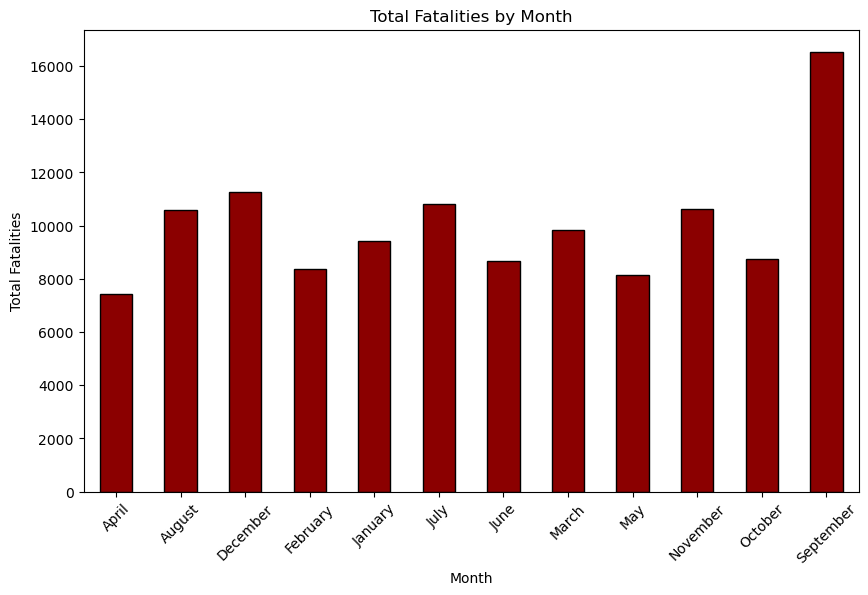

In [112]:
# data visualization
plt.figure(figsize=(10,6))
fatalities_by_month.plot(kind='bar', color='darkred', edgecolor='black')

plt.title("Total Fatalities by Month")
plt.xlabel("Month")
plt.ylabel("Total Fatalities")
plt.xticks(ticks=range(0,12), rotation=45)
plt.show()

End of Analysis